#              ***GENDER RECOGIZATION USING VOICE (ACOUSTIC VALUES)***

### Problem Statement
#### Gender Recognition by Voice and Speech Analysis - This is a dataset originally created to identify a voice as male or female, based upon acoustic properties of the voice and speech. The dataset consists of 3,168 recorded voice samples, collected from male and female speakers. The voice samples are pre-processed by acoustic analysis in R using the seewave and tuneR packages, with an analyzed frequency range of 0hz-280hz (human vocal range).

#### Aim - Split the given dataset into training and validation datasets and build a classifier on the training data and validate its performance on the validation dataset.

##  **Step 1: Importing  required libraries**

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB

import sklearn
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

##  **Step 2: Data-Analysis**

### 1.Importing the dataset:

In [5]:
voice_data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PROJECT/voice.csv')
voice_data.head()

meanfreq        sd    median       Q25       Q75       IQR       skew  \
0  0.059781  0.064241  0.032027  0.015071  0.090193  0.075122  12.863462   
1  0.066009  0.067310  0.040229  0.019414  0.092666  0.073252  22.423285   
2  0.077316  0.083829  0.036718  0.008701  0.131908  0.123207  30.757155   
3  0.151228  0.072111  0.158011  0.096582  0.207955  0.111374   1.232831   
4  0.135120  0.079146  0.124656  0.078720  0.206045  0.127325   1.101174   

          kurt    sp.ent       sfm  ...  centroid   meanfun    minfun  \
0   274.402906  0.893369  0.491918  ...  0.059781  0.084279  0.015702   
1   634.613855  0.892193  0.513724  ...  0.066009  0.107937  0.015826   
2  1024.927705  0.846389  0.478905  ...  0.077316  0.098706  0.015656   
3     4.177296  0.963322  0.727232  ...  0.151228  0.088965  0.017798   
4     4.333713  0.971955  0.783568  ...  0.135120  0.106398  0.016931   

     maxfun   meandom    mindom    maxdom   dfrange   modindx  label  
0  0.275862  0.007812  0.007812  0.007812  0.000000  0.000000   male  
1  0.250000  0.009014  0.007812  0.054688  0.046875  0.052632   male  
2  0.271186  0.007990  0.007812  0.015625  0.007812  0.046512   male  
3  0.250000  0.201497  0.007812  0.562500  0.554688  0.247119   male  
4  0.266667  0.712812  0.007812  5.484375  5.476562  0.208274   male  

[5 rows x 21 columns]

### 2.Data-proporties

#### Shape:

In [6]:
Shape=voice_data.shape
print(f" no.of rows={Shape[0]}\n no.of columns={Shape[1]}")

 no.of rows=3168
 no.of columns=21


#### Columns:

In [7]:
cols=pd.DataFrame(data=voice_data.columns,index=range(1,22))
cols

0
1   meanfreq
2         sd
3     median
4        Q25
5        Q75
6        IQR
7       skew
8       kurt
9     sp.ent
10       sfm
11      mode
12  centroid
13   meanfun
14    minfun
15    maxfun
16   meandom
17    mindom
18    maxdom
19   dfrange
20   modindx
21     label

#### Information of the dataset:

In [8]:
voice_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

####  DataType of each column

In [9]:
voice_data.dtypes

meanfreq    float64
sd          float64
median      float64
Q25         float64
Q75         float64
IQR         float64
skew        float64
kurt        float64
sp.ent      float64
sfm         float64
mode        float64
centroid    float64
meanfun     float64
minfun      float64
maxfun      float64
meandom     float64
mindom      float64
maxdom      float64
dfrange     float64
modindx     float64
label        object
dtype: object

#### Description of the dataset

In [10]:
voice_data.describe().T

count       mean         std       min       25%       50%  \
meanfreq  3168.0   0.180907    0.029918  0.039363  0.163662  0.184838   
sd        3168.0   0.057126    0.016652  0.018363  0.041954  0.059155   
median    3168.0   0.185621    0.036360  0.010975  0.169593  0.190032   
Q25       3168.0   0.140456    0.048680  0.000229  0.111087  0.140286   
Q75       3168.0   0.224765    0.023639  0.042946  0.208747  0.225684   
IQR       3168.0   0.084309    0.042783  0.014558  0.042560  0.094280   
skew      3168.0   3.140168    4.240529  0.141735  1.649569  2.197101   
kurt      3168.0  36.568461  134.928661  2.068455  5.669547  8.318463   
sp.ent    3168.0   0.895127    0.044980  0.738651  0.861811  0.901767   
sfm       3168.0   0.408216    0.177521  0.036876  0.258041  0.396335   
mode      3168.0   0.165282    0.077203  0.000000  0.118016  0.186599   
centroid  3168.0   0.180907    0.029918  0.039363  0.163662  0.184838   
meanfun   3168.0   0.142807    0.032304  0.055565  0.116998  0.140519   
minfun    3168.0   0.036802    0.019220  0.009775  0.018223  0.046110   
maxfun    3168.0   0.258842    0.030077  0.103093  0.253968  0.271186   
meandom   3168.0   0.829211    0.525205  0.007812  0.419828  0.765795   
mindom    3168.0   0.052647    0.063299  0.004883  0.007812  0.023438   
maxdom    3168.0   5.047277    3.521157  0.007812  2.070312  4.992188   
dfrange   3168.0   4.994630    3.520039  0.000000  2.044922  4.945312   
modindx   3168.0   0.173752    0.119454  0.000000  0.099766  0.139357   

                75%          max  
meanfreq   0.199146     0.251124  
sd         0.067020     0.115273  
median     0.210618     0.261224  
Q25        0.175939     0.247347  
Q75        0.243660     0.273469  
IQR        0.114175     0.252225  
skew       2.931694    34.725453  
kurt      13.648905  1309.612887  
sp.ent     0.928713     0.981997  
sfm        0.533676     0.842936  
mode       0.221104     0.280000  
centroid   0.199146     0.251124  
meanfun    0.169581     0.237636  
minfun     0.047904     0.204082  
maxfun     0.277457     0.279114  
meandom    1.177166     2.957682  
mindom     0.070312     0.458984  
maxdom     7.007812    21.867188  
dfrange    6.992188    21.843750  
modindx    0.209183     0.932374

## **Step 3 : Data Preprocess**
#### 1.Data cleaning (if null values present) ,
#### 2.Label Encoding (for Target column)  ,
#### 3.Shuffle the dataset ,
#### 4.Split the data into training and testing sets.

In [11]:
#checking for nullvalues
df1=voice_data.count()
df2=voice_data.isnull().sum()
null_info=pd.concat([df1,df2],axis=1)
null_info=null_info.rename(columns={0:'Total_count',1:'NUll_count'})
null_info

Total_count  NUll_count
meanfreq         3168           0
sd               3168           0
median           3168           0
Q25              3168           0
Q75              3168           0
IQR              3168           0
skew             3168           0
kurt             3168           0
sp.ent           3168           0
sfm              3168           0
mode             3168           0
centroid         3168           0
meanfun          3168           0
minfun           3168           0
maxfun           3168           0
meandom          3168           0
mindom           3168           0
maxdom           3168           0
dfrange          3168           0
modindx          3168           0
label            3168           0

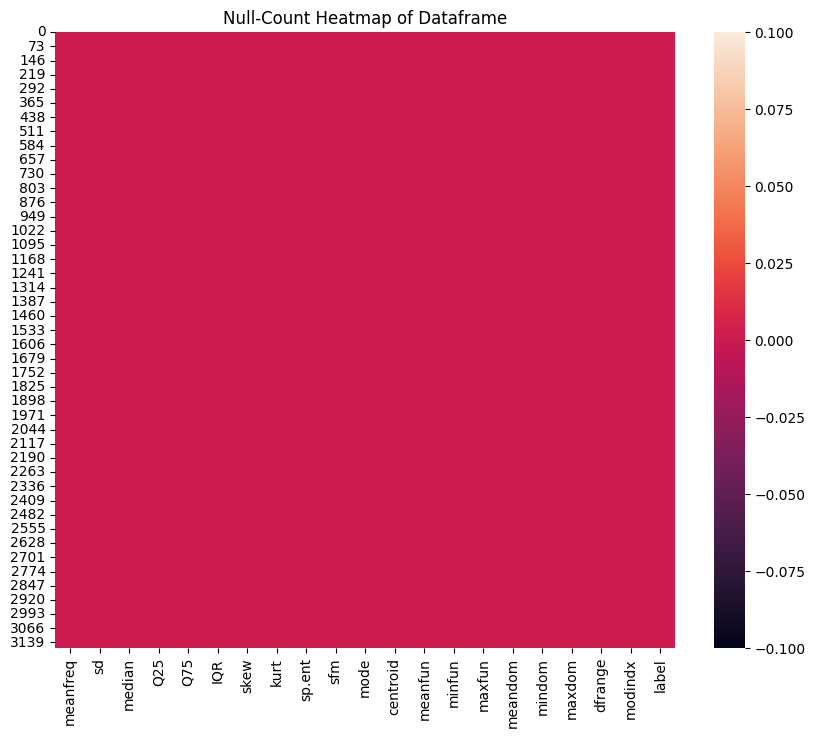

In [12]:
#NULL-COUNT Heatmap

plt.figure(figsize=(10, 8))
dataplot = sns.heatmap(voice_data.isnull())
plt.title("Null-Count Heatmap of Dataframe")
plt.savefig('null_count_heatmap.jpg')
plt.show()


In [13]:
#before label encoding
print(voice_data['label'],voice_data['label'].dtype)

0         male
1         male
2         male
3         male
4         male
         ...  
3163    female
3164    female
3165    female
3166    female
3167    female
Name: label, Length: 3168, dtype: object object


In [14]:
#Encoding the label because label is obj type system only understand numeric values
label_encoder=LabelEncoder()
voice_data['label']=label_encoder.fit_transform(voice_data['label'])

In [15]:
# after label encoding
print(voice_data['label'],voice_data['label'].dtype)

0       1
1       1
2       1
3       1
4       1
       ..
3163    0
3164    0
3165    0
3166    0
3167    0
Name: label, Length: 3168, dtype: int64 int64


In [16]:
#befor shuffling the data
voice_data.head(5)

meanfreq        sd    median       Q25       Q75       IQR       skew  \
0  0.059781  0.064241  0.032027  0.015071  0.090193  0.075122  12.863462   
1  0.066009  0.067310  0.040229  0.019414  0.092666  0.073252  22.423285   
2  0.077316  0.083829  0.036718  0.008701  0.131908  0.123207  30.757155   
3  0.151228  0.072111  0.158011  0.096582  0.207955  0.111374   1.232831   
4  0.135120  0.079146  0.124656  0.078720  0.206045  0.127325   1.101174   

          kurt    sp.ent       sfm  ...  centroid   meanfun    minfun  \
0   274.402906  0.893369  0.491918  ...  0.059781  0.084279  0.015702   
1   634.613855  0.892193  0.513724  ...  0.066009  0.107937  0.015826   
2  1024.927705  0.846389  0.478905  ...  0.077316  0.098706  0.015656   
3     4.177296  0.963322  0.727232  ...  0.151228  0.088965  0.017798   
4     4.333713  0.971955  0.783568  ...  0.135120  0.106398  0.016931   

     maxfun   meandom    mindom    maxdom   dfrange   modindx  label  
0  0.275862  0.007812  0.007812  0.007812  0.000000  0.000000      1  
1  0.250000  0.009014  0.007812  0.054688  0.046875  0.052632      1  
2  0.271186  0.007990  0.007812  0.015625  0.007812  0.046512      1  
3  0.250000  0.201497  0.007812  0.562500  0.554688  0.247119      1  
4  0.266667  0.712812  0.007812  5.484375  5.476562  0.208274      1  

[5 rows x 21 columns]

In [17]:
#after shuffling the data
shuffled_voice_data=voice_data.sample(frac=1).reset_index(drop=True)
shuffled_voice_data.head(5)

meanfreq        sd    median       Q25       Q75       IQR      skew  \
0  0.166046  0.057188  0.177352  0.108921  0.208147  0.099226  1.529905   
1  0.187154  0.053048  0.201888  0.167039  0.223119  0.056080  2.974554   
2  0.210379  0.044542  0.207963  0.187810  0.247841  0.060031  2.092086   
3  0.235271  0.029317  0.236563  0.223198  0.251933  0.028735  2.141051   
4  0.189991  0.060324  0.204712  0.126556  0.239846  0.113291  0.961993   

        kurt    sp.ent       sfm  ...  centroid   meanfun    minfun    maxfun  \
0   5.848867  0.931908  0.444206  ...  0.166046  0.095105  0.016377  0.262295   
1  14.106474  0.873341  0.386045  ...  0.187154  0.159235  0.016129  0.238806   
2   8.047210  0.880201  0.311898  ...  0.210379  0.158242  0.047013  0.274286   
3   7.623588  0.803982  0.124648  ...  0.235271  0.185272  0.048780  0.279070   
4   3.121155  0.923729  0.397331  ...  0.189991  0.129917  0.048096  0.279070   

    meandom    mindom     maxdom    dfrange   modindx  label  
0  0.481250  0.007812   3.765625   3.757812  0.178901      1  
1  0.637408  0.007812   4.929688   4.921875  0.161905      0  
2  1.335938  0.023438   8.789062   8.765625  0.089201      0  
3  1.992188  0.023438  10.242188  10.218750  0.151448      0  
4  1.271034  0.023438   4.898438   4.875000  0.098140      1  

[5 rows x 21 columns]

In [18]:
#splitting the data
x=shuffled_voice_data.iloc[:,:-1]
y=shuffled_voice_data['label']

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
print("no.of samples in train_set:",x_train.shape[0])
print("no.of samples in test_set:",x_test.shape[0])

no.of samples in train_set: 2534
no.of samples in test_set: 634


## **Explotary Data Analysis(EDA)**
#### An approach to analyze the data using visual techniques. It is used to discover trends, patterns, or to check assumptions with the help of statistical summary and graphical representations.

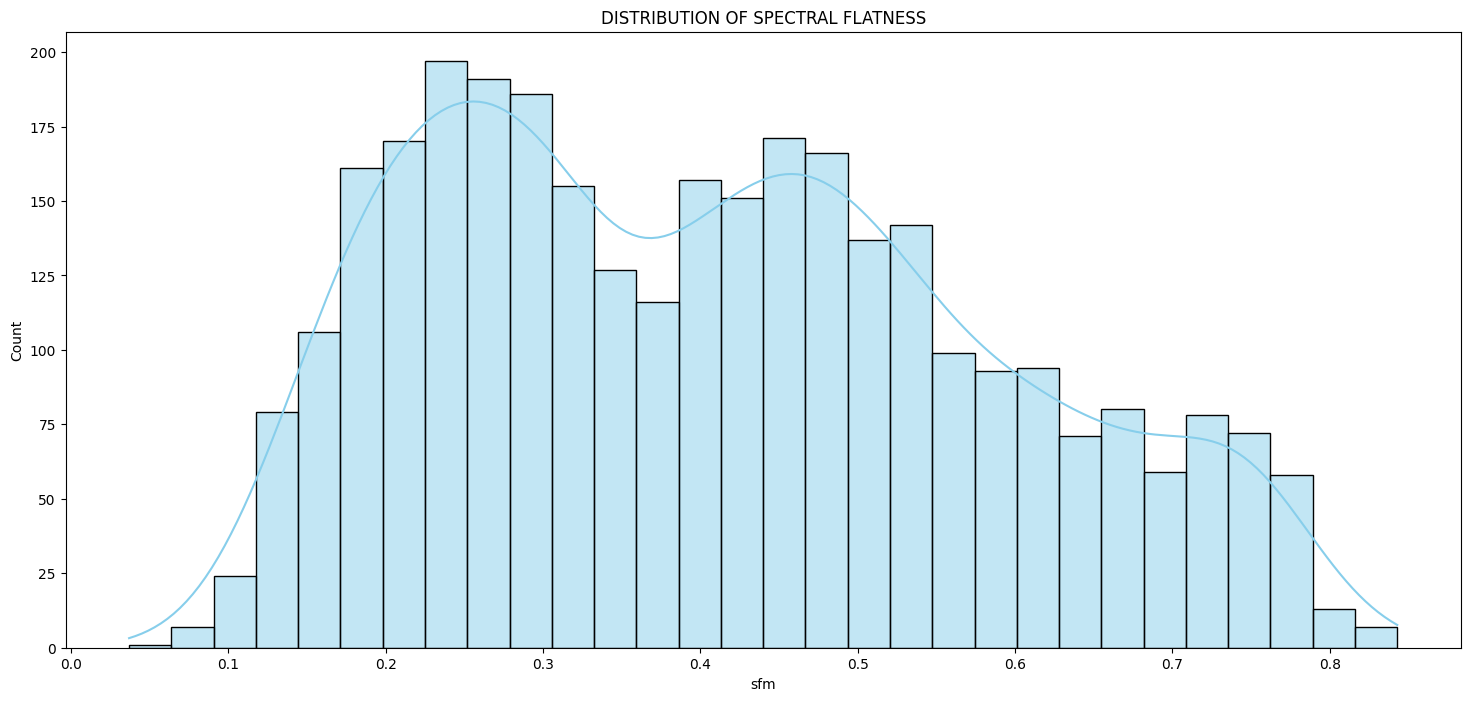

In [20]:
#checking the distribution of data.

plt.figure(figsize=(18,8))
sns.histplot(voice_data.sfm, color='skyblue',bins=30,kde=True)
plt.title("DISTRIBUTION OF SPECTRAL FLATNESS")
plt.savefig('DISTRIBUTION_OF_SPECTRAL_FLATNESS.jpg')
plt.show()

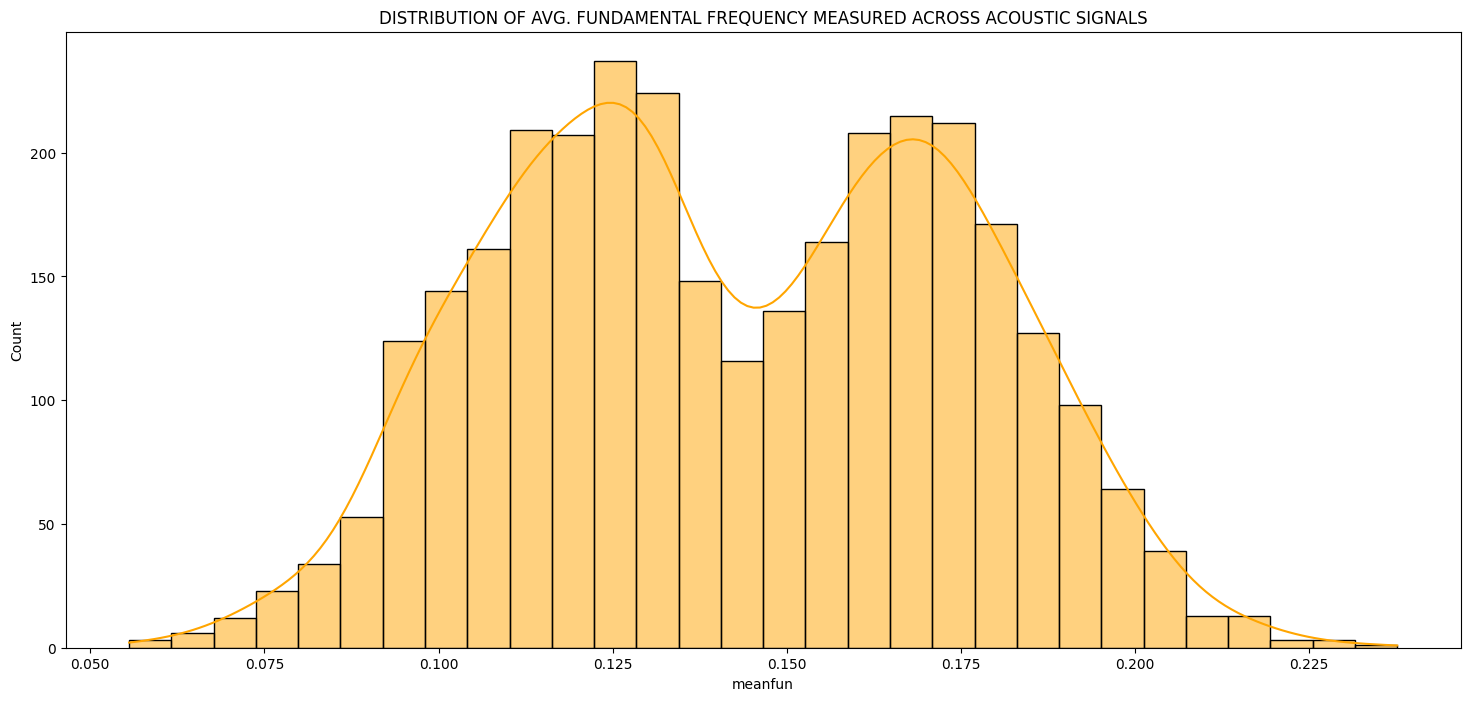

In [21]:
plt.figure(figsize=(18,8))
sns.histplot(voice_data.meanfun, color='orange',bins=30,kde=True)
plt.title("DISTRIBUTION OF AVG. FUNDAMENTAL FREQUENCY MEASURED ACROSS ACOUSTIC SIGNALS")
plt.savefig('Avg_Fundamenta_fre.jpg')
plt.show()

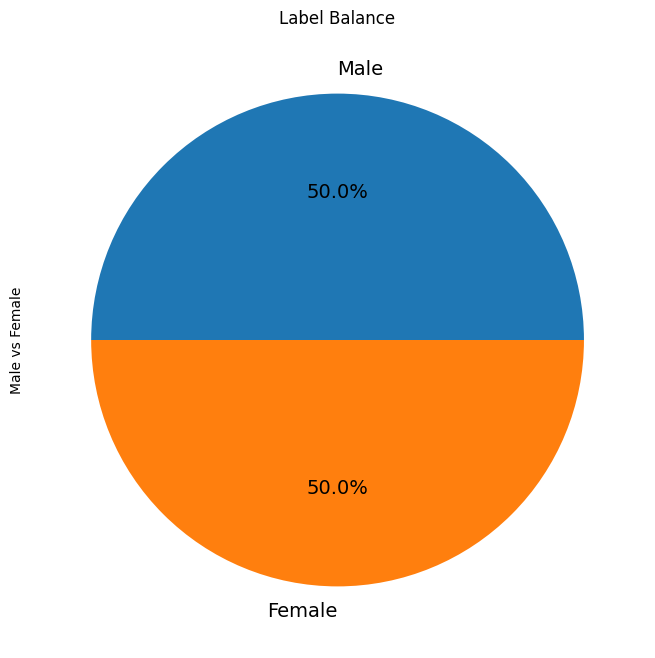

In [22]:
#Label Balance verification

plt.figure(figsize=(10, 8))
voice_data.label.value_counts().plot(kind="pie",
                                           fontsize=14,
                                           labels=["Male", "Female"],
                                           ylabel="Male vs Female",
                                           autopct='%1.1f%%');
plt.title("Label Balance")
plt.savefig('label_balance.jpg')
plt.show()

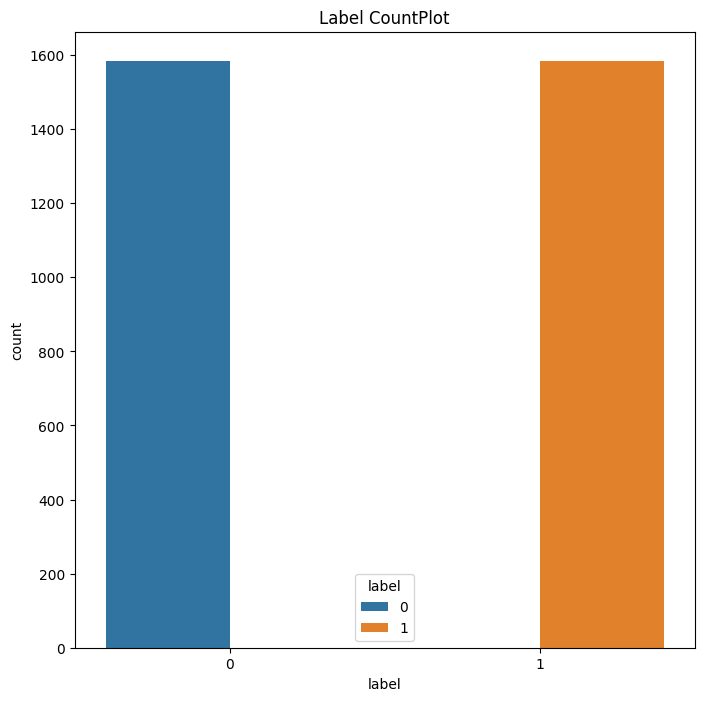

In [23]:
plt.figure(figsize=(8, 8))
sns.countplot(x="label",data=voice_data, hue='label')
plt.title("Label CountPlot")
plt.savefig('label_countplot.jpg')
plt.show()

In [ ]:
#correlation values
corr_values=voice_data.corr()

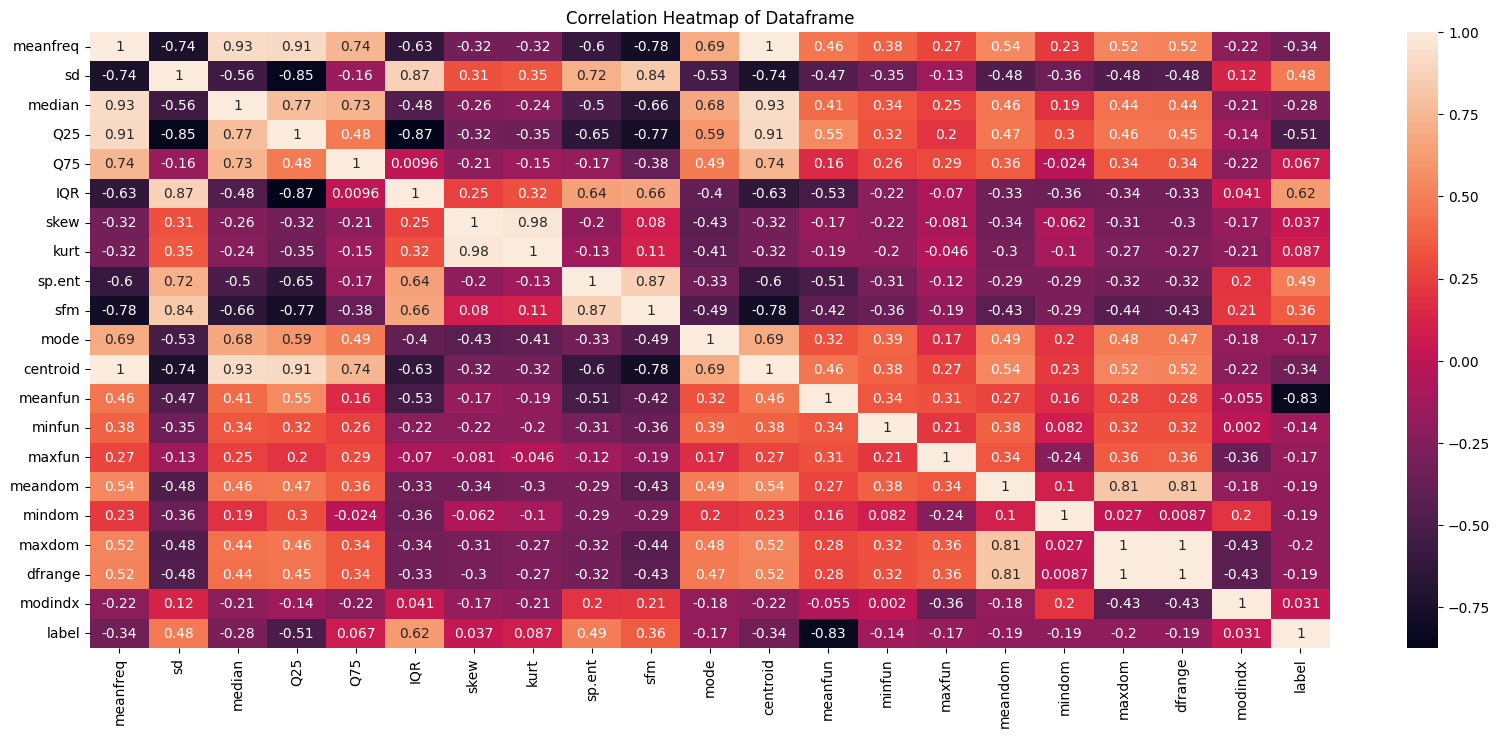

In [25]:
#Correlation Heatmap

plt.figure(figsize=(20, 8))
dataplot = sns.heatmap(voice_data.corr(), annot=True)
plt.title("Correlation Heatmap of Dataframe")
plt.savefig('correlation_heatmap.jpg')
plt.show()

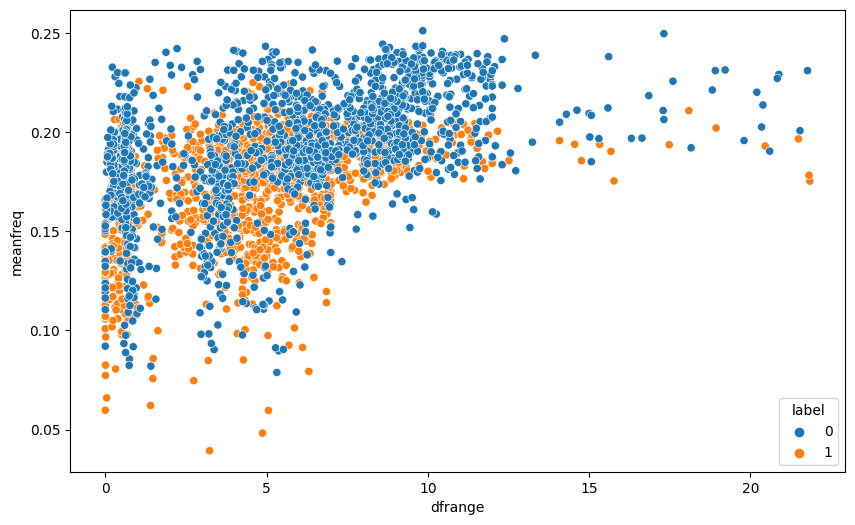

In [26]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=voice_data, x="dfrange", y="meanfreq", hue="label");
plt.savefig('scatterplot.jpg')

#dfrange: range of dominant frequency measured across acoustic signal
#meanfreq: mean frequency (in kHz)

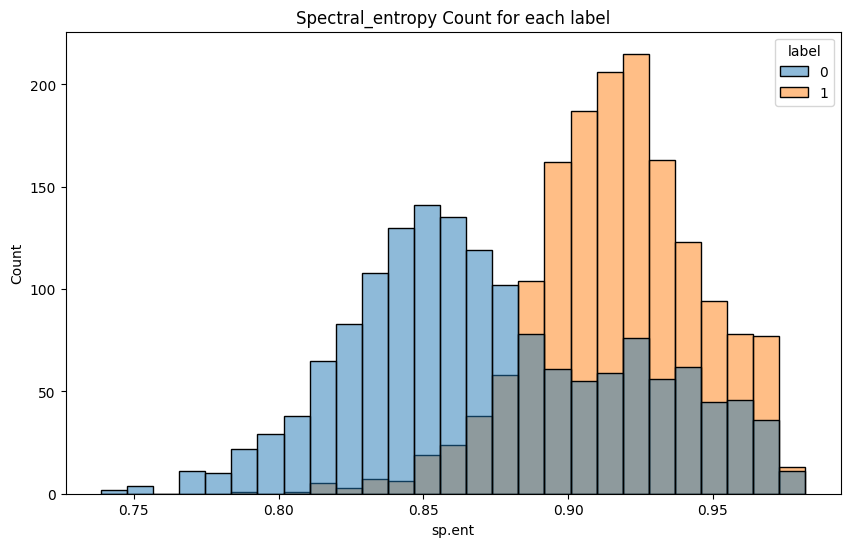

In [27]:
#sp.ent: spectral entropy

plt.figure(figsize=(10,6))
sns.histplot(data=voice_data,x="sp.ent", hue="label");
plt.title('Spectral_entropy Count for each label')
plt.savefig('sp_ent.jpg')

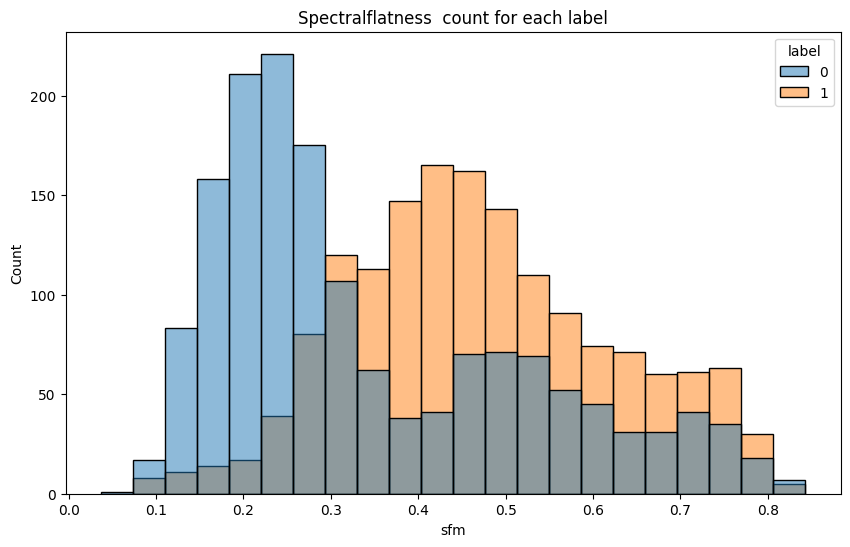

In [28]:
#sfm: spectral flatness

plt.figure(figsize=(10,6))
sns.histplot(data=voice_data,x="sfm", hue="label");
plt.title('Spectralflatness  count for each label')
plt.savefig('sfn.jpg')

## **MODELS BUILDING**

#### REGRESSION MODEL

In [30]:
lr_classifier_model=LogisticRegression()
lr_classifier_model.fit(x_train,y_train)

LogisticRegression()

In [31]:
lr_test_accuracy = lr_classifier_model.score(x_test, y_test)
print(f"Validation Accuracy of Logisitic Regression Classifier is: {(lr_test_accuracy )*100:.2f}%")

Validation Accuracy of Logisitic Regression Classifier is: 89.91%


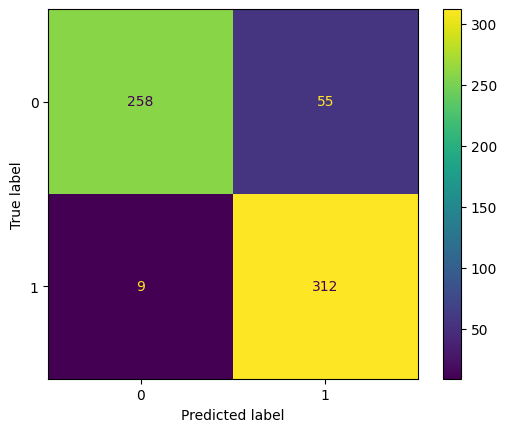

In [35]:
sklearn.metrics.ConfusionMatrixDisplay.from_estimator(lr_classifier_model, x_test, y_test)


### KNN Classifier

In [39]:
knn_classifier_model = KNeighborsClassifier(n_neighbors=5) # We always use odd numbers for this to avoid ties
knn_classifier_model.fit(x_train, y_train)

KNeighborsClassifier()

In [41]:
knn_test_accuracy = knn_classifier_model.score(x_test, y_test)
print(f"Validation Accuracy of KNN Clf. is: {(knn_test_accuracy)*100:.2f}%")

Validation Accuracy of KNN Clf. is: 72.87%


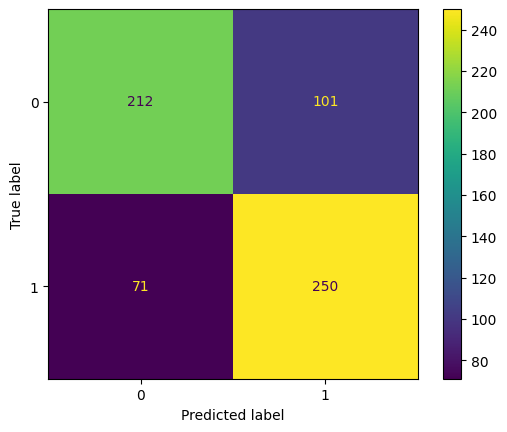

In [42]:
sklearn.metrics.ConfusionMatrixDisplay.from_estimator(knn_classifier_model, x_test, y_test)

### Decision Tree Classifier

In [44]:
dt_classifier_model = DecisionTreeClassifier()
dt_classifier_model.fit(x_train, y_train)

DecisionTreeClassifier()

In [46]:
dt_test_accuracy = dt_classifier_model.score(x_test, y_test)
print(f"Validation Accuracy of Decision Tree Clf. is: {(dt_test_accuracy)*100:.2f}%")

Validation Accuracy of Decision Tree Clf. is: 96.21%


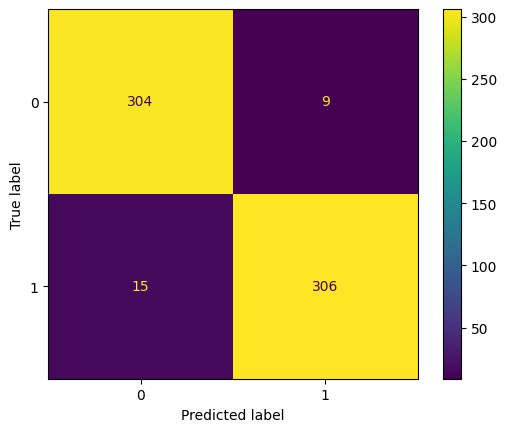

In [47]:
sklearn.metrics.ConfusionMatrixDisplay.from_estimator(dt_classifier_model, x_test,y_test)

### Random Forest

In [49]:
rfc_model = RandomForestClassifier()
rfc_model.fit(x_train, y_train)

RandomForestClassifier()

In [66]:
from sklearn.tree import export_graphviz

estimator = rfc_model.estimators_[5]

export_graphviz(estimator,
                out_file='tree.dot',
                rounded = True, proportion = False,
                precision = 2, filled = True)

from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

from IPython.display import Image
Image(filename = 'tree.png')

In [51]:
rfc_test_accuracy = rfc_model.score(x_test,y_test)
print(f"Validation Accuracy of Random Forest Classifier is: {(rfc_test_accuracy)*100:.2f}%")

Validation Accuracy of Random Forest Classifier is: 97.48%


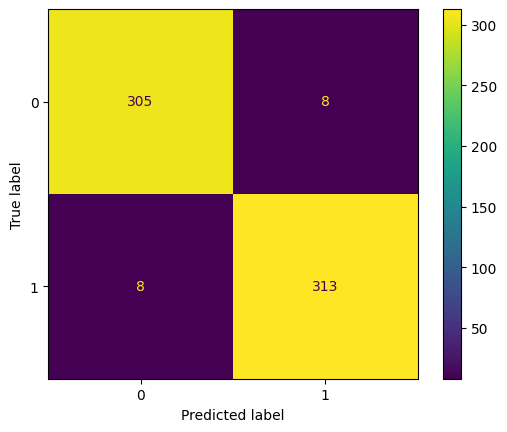

In [52]:
sklearn.metrics.ConfusionMatrixDisplay.from_estimator(rfc_model, x_test,y_test)

### Naive Baye's

In [55]:
nb_classifier_model = GaussianNB()
nb_classifier_model.fit(x_train, y_train)

GaussianNB()

In [56]:
nb_test_accuracy = nb_classifier_model.score(x_test,y_test)
print(f"Validation Accuracy of Naive Bayes Classifier is: {(nb_test_accuracy)*100:.2f}%")

Validation Accuracy of Naive Bayes Classifier is: 88.33%


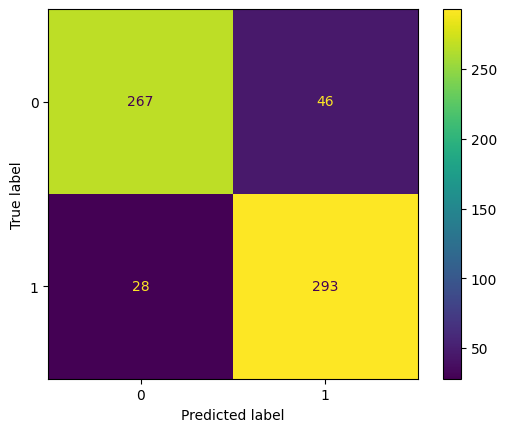

In [59]:
sklearn.metrics.ConfusionMatrixDisplay.from_estimator(nb_classifier_model, x_test, y_test)

## COMPARING ALL MODEL USING ACCURACY

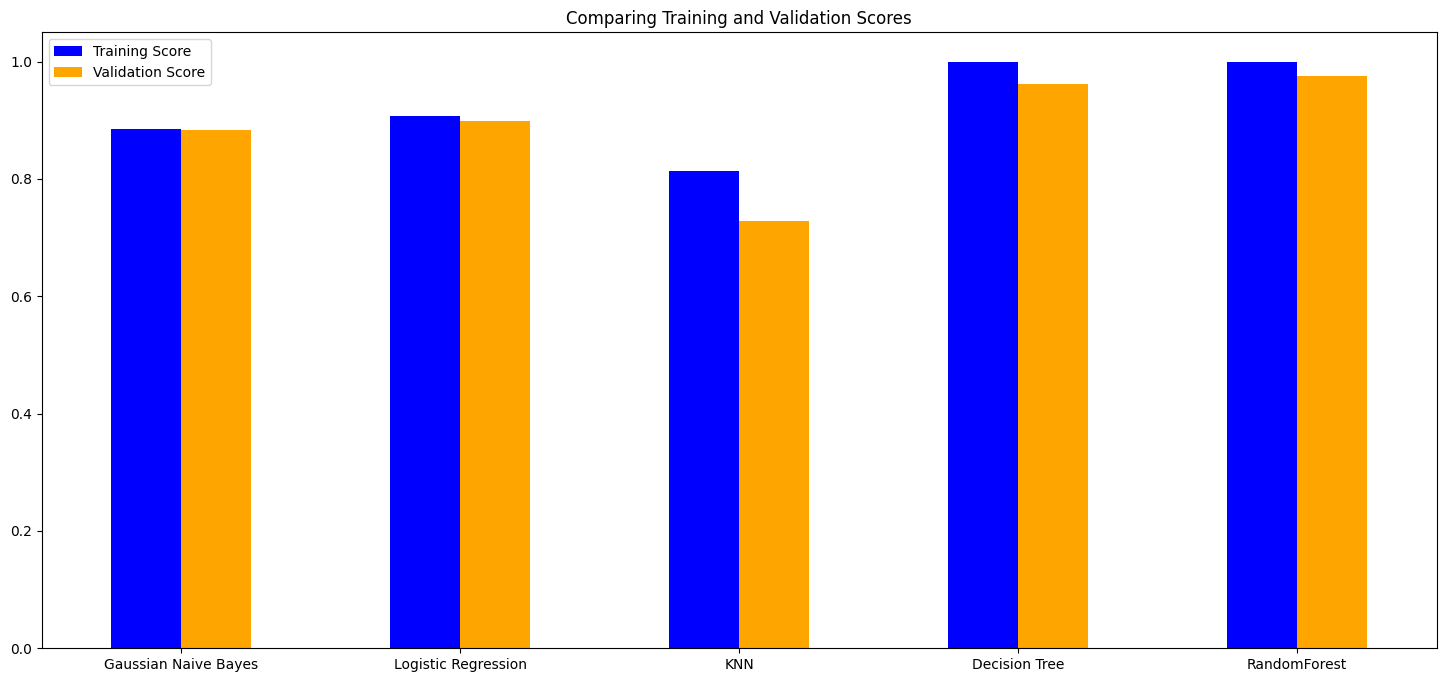

In [61]:
trainScores = [nb_classifier_model.score(x_train, y_train),lr_classifier_model.score(x_train, y_train) ,knn_classifier_model.score(x_train, y_train),dt_classifier_model.score(x_train, y_train),rfc_model.score(x_train, y_train)]
valScores = [nb_test_accuracy,lr_test_accuracy,knn_test_accuracy,dt_test_accuracy,rfc_test_accuracy]
indices = ['Gaussian Naive Bayes', 'Logistic Regression', 'KNN','Decision Tree', 'RandomForest']
scores = pd.DataFrame({'Training Score': trainScores,'Validation Score': valScores}, index=indices)
plot = scores.plot.bar(figsize=(18, 8), rot=0, color=['blue', 'orange'])
plt.title('Comparing Training and Validation Scores')
plt.show()

In [65]:
models = pd.DataFrame({
    'Model': ['Gaussian Naive Bayes', 'Logistic Regression', 'KNN','Decision Tree', 'RandomForest'],
    'Score': [nb_test_accuracy,lr_test_accuracy,knn_test_accuracy,dt_test_accuracy,rfc_test_accuracy]})

models.sort_values(by='Score', ascending=False)

Model     Score
4          RandomForest  0.974763
3         Decision Tree  0.962145
1   Logistic Regression  0.899054
0  Gaussian Naive Bayes  0.883281
2                   KNN  0.728707